In [1]:
import sys
sys.path.append('..')

from baselines.gnn.trainer import Trainer

c:\Users\iwama\Desktop\Maciej\Eng\meteoapp-data\venv\lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0
  warnings.warn(


In [2]:
import time
start = time.time()
trainer = Trainer(architecture='trans', hidden_dim=32, lr=1e-3, additional_encodings=True)
# trainer.load_model('test.pt')
stop = time.time()
print(f'Elapsed time: {stop-start} [s]') 

Elapsed time: 30.259751081466675 [s]


In [3]:
# print(next(iter(trainer.train_loader)))

Epoch 1/200, Train Loss: 3904.0793, lr: 0.001
Val Loss: 2896.0892
---------
Epoch 2/200, Train Loss: 2841.8452, lr: 0.001
Val Loss: 2684.1171
---------
Epoch 3/200, Train Loss: 2643.3799, lr: 0.001
Val Loss: 2450.2651
---------
Epoch 4/200, Train Loss: 2465.6692, lr: 0.001
Val Loss: 2273.8287
---------
Epoch 5/200, Train Loss: 2365.3366, lr: 0.001
Val Loss: 2224.7343
---------
Epoch 6/200, Train Loss: 2314.6190, lr: 0.001
Val Loss: 2196.8084
---------
Epoch 7/200, Train Loss: 2277.0023, lr: 0.001
Val Loss: 2175.2338
---------
Epoch 8/200, Train Loss: 2247.0263, lr: 0.001
Val Loss: 2157.3309
---------
Epoch 9/200, Train Loss: 2219.5375, lr: 0.001
Val Loss: 2144.6737
---------
Epoch 10/200, Train Loss: 2195.2030, lr: 0.001
Val Loss: 2138.7143
---------
Epoch 11/200, Train Loss: 2173.9477, lr: 0.001
Val Loss: 2137.8900
---------
Epoch 12/200, Train Loss: 2153.4665, lr: 0.001
Val Loss: 2141.5539
---------
Epoch 13/200, Train Loss: 2131.9711, lr: 0.001
Val Loss: 2142.8817
---------
Epoch 14

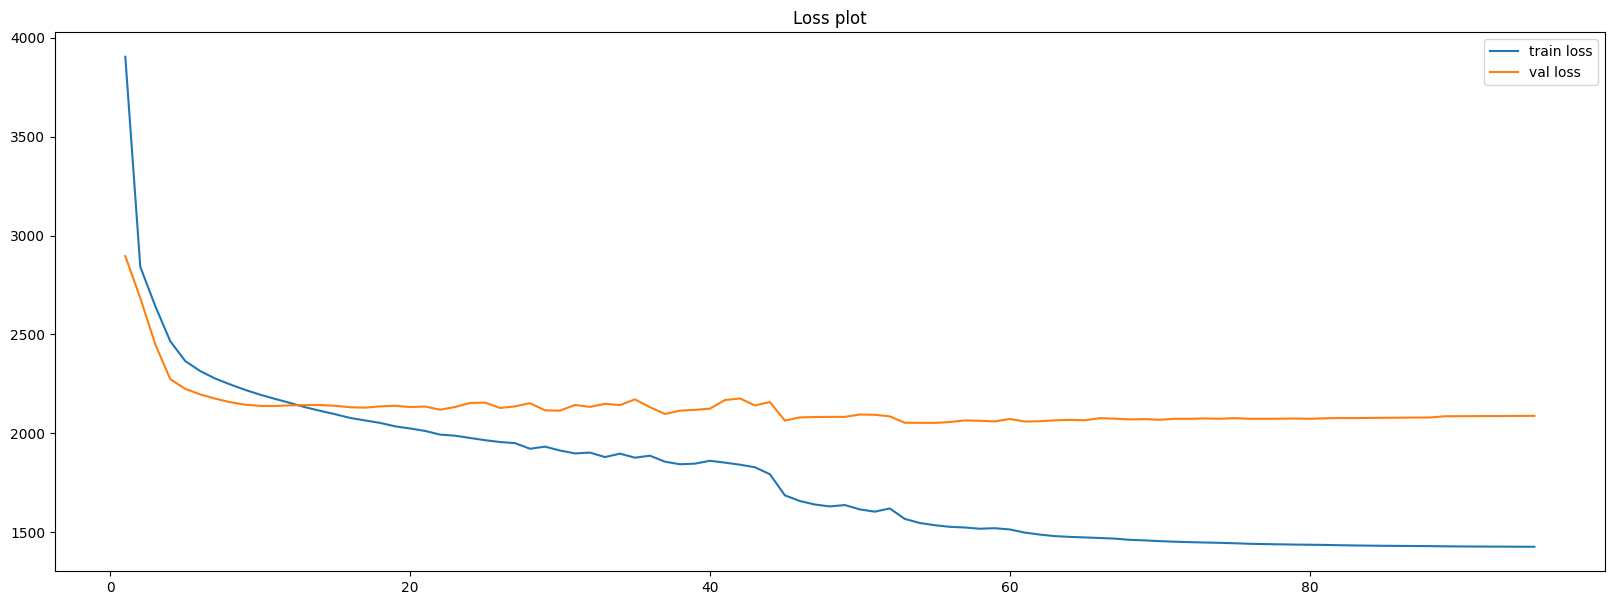

In [4]:
trainer.train(num_epochs=200)

RMSE for t2m: 1.2447595596313477; MAE for t2m: 0.9641442894935608;
RMSE for sp: 2.738847255706787; MAE for sp: 2.1308352947235107;
RMSE for tcc: 0.20630621910095215; MAE for tcc: 0.15706181526184082;
RMSE for u10: 1.4529190063476562; MAE for u10: 1.2381826639175415;
RMSE for v10: 1.2016781568527222; MAE for v10: 0.9507866501808167;
RMSE for tp: 0.0004555805353447795; MAE for tp: 0.0002299558836966753;


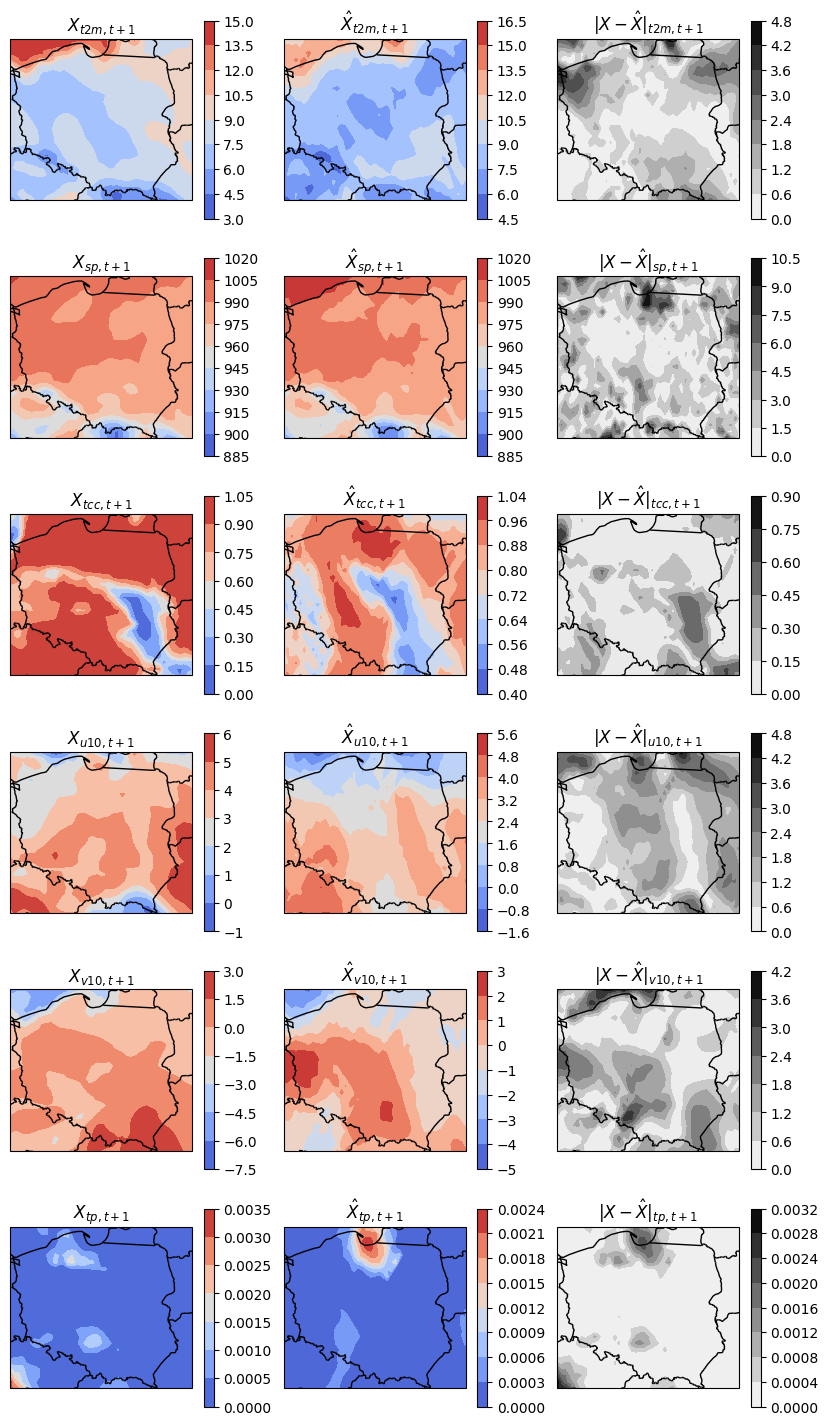

In [5]:
# trainer.plot_predictions("train")
# trainer.plot_predictions("val")
trainer.plot_predictions("test", pretty=True)

In [6]:
trainer.evaluate("train")

RMSE for t2m: 1.6556915415868632; MAE for t2m: 1.279141892964208;
RMSE for sp: 2.8446967450003413; MAE for sp: 2.182205683912057;
RMSE for tcc: 0.2575204302768102; MAE for tcc: 0.19566861538062094;
RMSE for u10: 1.2244121730747746; MAE for u10: 0.922074406168562;
RMSE for v10: 1.1848119100403887; MAE for v10: 0.885520419090952;
RMSE for tp: 0.00020019487755925899; MAE for tp: 7.966972961126179e-05;


In [7]:
trainer.evaluate("val")

RMSE for t2m: 2.0199542927026695; MAE for t2m: 1.4950487002017772;
RMSE for sp: 3.051067343306917; MAE for sp: 2.3387508190080366;
RMSE for tcc: 0.2725293943572627; MAE for tcc: 0.20695266222912975;
RMSE for u10: 1.3372122986645616; MAE for u10: 1.006518805598888;
RMSE for v10: 1.3202149113441903; MAE for v10: 0.9826869839724468;
RMSE for tp: 0.0002864765452832391; MAE for tp: 9.80362321263667e-05;


In [8]:
trainer.evaluate("test")

RMSE for t2m: 1.974427113380953; MAE for t2m: 1.4735175677399692;
RMSE for sp: 3.0380306448153744; MAE for sp: 2.3257127168356435;
RMSE for tcc: 0.2734310410071554; MAE for tcc: 0.20876146246487542;
RMSE for u10: 1.3310896599593482; MAE for u10: 1.003279200552064;
RMSE for v10: 1.3154664185011649; MAE for v10: 0.9772039496039282;
RMSE for tp: 0.0003004011014054141; MAE for tp: 0.00010051129809623288;


In [9]:
# data2020-2022.grib

# Transformer: Epoch 50/50, Train Loss: 1631.7028, lr: 0.000125 Val Loss: 1995.9098  *10 epoch < 2.1k                    627.07288813591 [s]; 577.6894102096558 [s] - no spatial mapping Val Loss: 2773.0315

# GAT:         Epoch 50/50, Train Loss: 1912.3626, lr: 6.25e-05 Val Loss: 2068.4888  *rmse sp ~ 6                        710.3302898406982 [s]; 

# GEN:         Epoch 50/50, Train Loss: 1738.9288, lr: 0.000125 Val Loss: 2400.2730  *rmse sp ~ 6                        632.7618696689606 [s]
#              Epoch 50/50, Train Loss: 1926.7893, lr: 3.125e-05Val Loss: 2358.8036                                      250.7063798904419 [s] with num_layers!!!

# CGCN:        Epoch 50/50, Train Loss: 1973.3904, lr: 0.001    Val Loss: 2126.4853                                      580.7204239368439 [s]

# PDN:         Epoch 50/50, Train Loss: 1991.0188, lr: 0.000125 Val Loss: 2150.5120 *rmse sp ~ 6                         674.661036491394 [s]
# h_chnnls*4   Epoch 50/50, Train Loss: 1984.7307, lr: 0.00025  Val Loss: 2160.6990                                      660.2813837528229 [s]


# BEST mapping:

# RMSE for t2m: 1.9502057215900213; MAE for t2m: 1.460449989283434;
# RMSE for sp: 3.399038812459811; MAE for sp: 2.5950842092613984;
# RMSE for tcc: 0.27409164273468917; MAE for tcc: 0.21394984584361584;
# RMSE for u10: 1.3402054937222394; MAE for u10: 1.003815006674253;
# RMSE for v10: 1.3046558578388197; MAE for v10: 0.9701394707445763;
# RMSE for tp: 0.00028378795573663634; MAE for tp: 9.744955463428279e-05;

# BEST no mapping:

# RMSE for t2m: 1.848757972304198; MAE for t2m: 1.395213300597085;
# RMSE for sp: 3.449658892501596; MAE for sp: 2.667022191931498;
# RMSE for tcc: 0.27683438137853805; MAE for tcc: 0.21672284132768843;
# RMSE for u10: 1.410872957033123; MAE for u10: 1.0491217187220006;
# RMSE for v10: 1.3660170921185273; MAE for v10: 1.0087554784574733;
# RMSE for tp: 0.00027853536544616465; MAE for tp: 9.733342513856305e-05;

# [CGCN]

### Full training:

N = 5; hidden = 32; batch=4; s = 3:
 
RMSE for f0: 2.2464043976548047; MAE for f0: 1.6999678436793948;

RMSE for f1: 1.9364765893388307; MAE for f1: 1.408220916940946;

RMSE for f2: 0.28386787466464225; MAE for f2: 0.21952327282997064;

RMSE for f3: 1.411270602820433; MAE for f3: 1.0502013356032074;

RMSE for f4: 1.412410520285922; MAE for f4: 1.0404767270553594;

RMSE for f5: 0.0002722878701922671; MAE for f5: 0.0001054861260521275;

------------------------------------------------------------------------

N = 5; hidden = 64; batch=4; s = 3:

RMSE for f0: 2.205407197194004; MAE for f0: 1.6519353043910658;

RMSE for f1: 2.029980887836009; MAE for f1: 1.4714761668475365;

RMSE for f2: 0.28731255755261337; MAE for f2: 0.22192368753909236;

RMSE for f3: 1.4478491874482888; MAE for f3: 1.0733782789693203;

RMSE for f4: 1.4493260989133352; MAE for f4: 1.058615083231145;

RMSE for f5: 0.0002749573712955729; MAE for f5: 0.00010411299434883103;

------------------------------------------------------------------------

With bigger batch_size training is more stable (almost no overfitting) but it does not improve performance

------------------------------------------------------------------------

N = 10; hidden = 32; batch=32; no significant difference, much longer training; even worse performance

------------------------------------------------------------------------

N = 10; hidden = 32; batch=32; mlp - 3 layers for encoder and decoder each - totally failed to learn sufficient representation; loss after 100 epochs is 2x bigger

------------------------------------------------------------------------

With gradient clip=100; h=32; b=32; n=5 -> loss plot is more smooth; no performance improvement

------------------------------------------------------------------------

Using learning constants advised by authors of graphcast does not improve performance (it is actually worse) but training is super stable - no overfittin at all:
clip=32; self.optimizer = torch.optim.AdamW(self.model.parameters(), betas=(0.9, 0.95), weight_decay=0.1); h=32; b=32

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 7

Epoch 100/100, Train Loss: 1848.7699, lr: 3.125e-05 Val Loss: 2230.6389
735.7001855373383 [s]22666046945865614

RMSE for t2m: 1.8891855143316563; MAE for t2m: 1.4600152796625336;

RMSE for sp: 2.0393454691406316; MAE for sp: 1.5120049358744065;

RMSE for tcc: 0.2860184447921189; MAE for tcc: 0.22666046945865614;

RMSE for u10: 1.4378177755816777; MAE for u10: 1.0736904505733116;

RMSE for v10: 1.4574477223923084; MAE for v10: 1.0663613129750227;

RMSE for tp: 0.0002711004547077864; MAE for tp: 0.00010284140930705948;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 3

Epoch 99/100, Train Loss: 1955.0575, lr: 0.0005 Val Loss: 2207.3025

693.315672159195 [s]

RMSE for t2m: 2.3858469221825898; MAE for t2m: 1.8332994478389537;

RMSE for sp: 1.9815898823743083; MAE for sp: 1.4750331930477616;

RMSE for tcc: 0.28416700897460695; MAE for tcc: 0.23001444125440887;

RMSE for u10: 1.4444404739897925; MAE for u10: 1.0740849332227052;

RMSE for v10: 1.4384182183045433; MAE for v10: 1.05619047567965;

RMSE for tp: 0.0002669724249068656; MAE for tp: 0.00010341137409668945;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 5

Epoch 100/100, Train Loss: 1901.1544, lr: 6.25e-05 Val Loss: 2181.1193

678.085875749588 [s]

RMSE for t2m: 1.8778959983044772; MAE for t2m: 1.4465936457254398;

RMSE for sp: 2.190103341129505; MAE for sp: 1.6404208756272267;

RMSE for tcc: 0.2848521568307657; MAE for tcc: 0.22361195825242483;

RMSE for u10: 1.437490006965024; MAE for u10: 1.0706755302203412;

RMSE for v10: 1.4364091328286357; MAE for v10: 1.0579831289563082;

RMSE for tp: 0.0002660477946055829; MAE for tp: 0.00010596483422627151;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 5; r=2

Epoch 100/100, Train Loss: 1882.7291, lr: 1.5625e-05 Val Loss: 2143.8953 (*at some point 2129)

887.3842961788177 [s]

RMSE for t2m: 1.8323451416138599; MAE for t2m: 1.4136113810162858;

RMSE for sp: 2.0521229454022802; MAE for sp: 1.527130837420577;

RMSE for tcc: 0.2793271584790608; MAE for tcc: 0.21826436014217337;

RMSE for u10: 1.3972067698487758; MAE for u10: 1.0433846660489516;

RMSE for v10: 1.4072224335796066; MAE for v10: 1.0366618030650943;

RMSE for tp: 0.00026956517312684114; MAE for tp: 0.0001043501217544922;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 5; r = 2; 32x48;

Epoch 100/100, Train Loss: 2461.7144, lr: 6.25e-05 Val Loss: 3011.8880

1520.1190974712372 [s]

RMSE for t2m: 1.7308520625058639; MAE for t2m: 1.3247728998925457;

RMSE for sp: 2.3992479669737645; MAE for sp: 1.7568102339318754;

RMSE for tcc: 0.2805274129657387; MAE for tcc: 0.21913696437798416;

RMSE for u10: 1.4401554352858472; MAE for u10: 1.0654466357169252;

RMSE for v10: 1.4595404951536077; MAE for v10: 1.0686582104736524;

RMSE for tp: 0.0002717262792747912; MAE for tp: 0.00010331567566263692;

------------------------------------------------------------------------

N = 5; hidden = 32; batch = 4; s = 5; r = 2; 32x48 -> 25x45;
~ 1140 s; Train Loss: 1686.4399, lr: 6.25e-05Val Loss: 2182.0108 (2 trainings)

RMSE for t2m: 1.784685209006511; MAE for t2m: 1.3758342778804562;

RMSE for sp: 2.7761703742751234; MAE for sp: 2.0798808012966767;

RMSE for tcc: 0.278589605641175; MAE for tcc: 0.21694147138915904;

RMSE for u10: 1.413366736459174; MAE for u10: 1.0589858767124307;

RMSE for v10: 1.416900322369188; MAE for v10: 1.0449888444043014;

RMSE for tp: 0.00027346005336134616; MAE for tp: 0.00010490509133304818;